# **Deep Learning Project** - Aerial Perspective Object Detection
SEP 769 - Group 2

In [ ]:
#About semantic segmentation: https://www.jeremyjordan.me/semantic-segmentation/
#TF Tutorial: https://www.tensorflow.org/tutorials/images/segmentation
#TF load and process images: https://www.tensorflow.org/tutorials/load_data/images

#Different image nets: https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5
#TF Resnet: 


from google.colab import drive
import tensorflow as tf
import tensorflow_datasets as tfds
drive.mount('/content/gdrive')
import cv2
import glob
import numpy as np
import os
import fnmatch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

if not os.path.exists("/content/gdrive/Shareddrives/SEP_769/data/drone_data/"):
  !unzip "/content/gdrive/Shareddrives/SEP_769/drone_data.zip" -d "/content/gdrive/Shareddrives/SEP_769/data"

#image1 = cv2.imread('{}000.jpg'.format(original_images_path)) #original size image
#image2 = cv2.resize(cv2.imread('{}000.jpg'.format(original_images_path), flags=1), (0,0), fx=0.05, fy=0.05)  #smaller image
#print(image1.shape)
#print(image2.shape)

#print('\nTotal of {} images at path: \n{}\n\n'.format(image_count, original_images_path))

#40 for test
#360 for train

#pixel accuracy, Intersection over Union (IOU)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#*Constants and Functions*

In [ ]:
original_images_path = '/content/gdrive/Shareddrives/SEP_769/data/drone_data/original_images/'
original_semantic_path = '/content/gdrive/Shareddrives/SEP_769/data/drone_data/label_images_semantic/'
HEIGHT = 192
WIDTH = 320
VAL_SPLIT = 0.9

# reads images from dir, resizes and returns np array
# optional file type argument ext
def images_to_array(dir, width, height, ext='.jpg'):
  data = []
  files = os.listdir(dir)
  files.sort()
  for filename in files:
    if filename.endswith(ext):
      img = cv2.imread(dir+filename,flags=1)
      img = cv2.resize(img, (width, height))
      data.append(img)

  return np.array(data)

def labels_to_array(dir, width, height, ext='.jpg'):
  data = []
  files = os.listdir(dir)
  files.sort()
  for filename in files:
    if filename.endswith(ext):
      img = cv2.imread(dir+filename,flags=0)
      img = cv2.resize(img, (width, height))
      data.append(img)

  return np.array(data)

# displays a number of originals with their masks
def display_images(images):
  plt.figure(figsize=(15,10))
  for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    if len(images[i].shape) == 3:
      plt.imshow(images[i])
    else:
      plt.imshow(images[i], cmap="gray", vmin=0, vmax=255)
  plt.show()



#plt.imshow(original_images[0])
#plt.show()
#print(original_images[0].shape)
#plt.imshow(semantic_images[0])
#plt.show()
#print(semantic_images[0].shape) 

#Prepping Import Data

In [ ]:
images = images_to_array(original_images_path, width=WIDTH, height=HEIGHT)
print('Imported images shape: ', images.shape)

labels = labels_to_array(original_semantic_path, width=WIDTH, height=HEIGHT, ext='png')
print('Imported labels shape: ', labels.shape)

rgb_masks = images_to_array(rgb_masks_path, width=WIDTH, height=HEIGHT, ext='png')

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)
X_train, X_val, Y_train, Y_val, = train_test_split(x_train, y_train, test_size=0.2)
X_train = X_train / 255.0
x_test = x_test / 255.0
X_val = X_val / 255.0
Y_train = Y_train 
y_test = y_test 
Y_val = Y_val 


print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(x_test.shape)
print(y_test.shape)



(400, 192, 320, 3)
(400, 192, 320)
(288, 192, 320, 3)
(288, 192, 320)
(72, 192, 320, 3)
(72, 192, 320)
(40, 192, 320, 3)
(40, 192, 320)


#Data Exploration

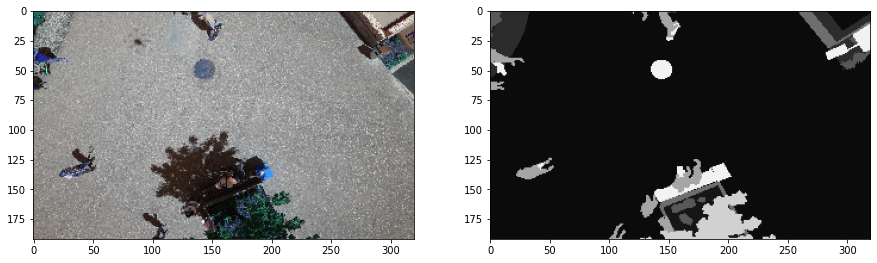

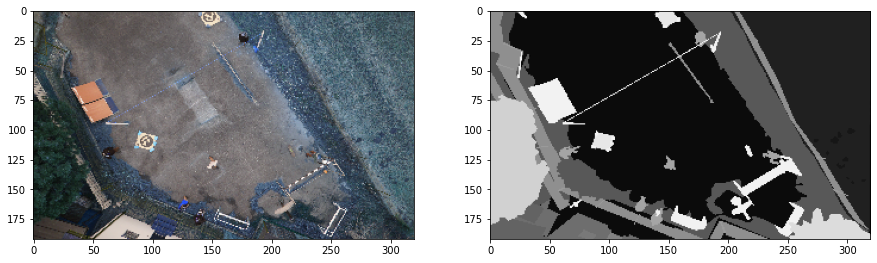

In [ ]:
for i in range(2):
  display_images([images[i], labels[i]*11])
  
for i in range(10):
  display_images([images[i], labels[i], cv2.cvtColor(rgb_masks[i],cv2.COLOR_RGB2BGR)])


#Model-Resnet Improved Method




Model Created.



Epoch 1/50
288/288 [==============================] - 3s 8ms/step - loss: 2.9765 - accuracy: 0.2757 - val_loss: 2.9121 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/gdrive/Shareddrives/SEP_769/Checkpoints/assets


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
288/288 [==============================] - 2s 8ms/step - loss: 2.6970 - accuracy: 0.3273 - val_loss: 2.7994 - val_accuracy: 0.2376
INFO:tensorflow:Assets written to: /content/gdrive/Shareddrives/SEP_769/Checkpoints/assets


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 3/50
288/288 [==============================] - 2s 8ms/step - loss: 2.5358 - accuracy: 0.3409 - val_loss: 2.6145 - val_accuracy: 0.2461
Epoch 4/50
288/288 [==============================] - 2s 7ms/step - loss: 2.4059 - accuracy: 0.3537 - val_loss: 2.7083 - val_accuracy: 0.1372
INFO:tensorflow:Assets written to: /content/gdrive/Shareddrives/SEP_769/Checkpoints/assets


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 5/50
288/288 [==============================] - 2s 8ms/step - loss: 2.3093 - accuracy: 0.3625 - val_loss: 2.5463 - val_accuracy: 0.1964
Epoch 6/50
288/288 [==============================] - 2s 7ms/step - loss: 2.2275 - accuracy: 0.3668 - val_loss: 2.3648 - val_accuracy: 0.2798
Epoch 7/50
288/288 [==============================] - 2s 7ms/step - loss: 2.1649 - accuracy: 0.3663 - val_loss: 2.1802 - val_accuracy: 0.3937
Epoch 8/50
288/288 [==============================] - 2s 7ms/step - loss: 2.1225 - accuracy: 0.3659 - val_loss: 2.0583 - val_accuracy: 0.4273
Epoch 9/50
288/288 [==============================] - 2s 7ms/step - loss: 2.0863 - accuracy: 0.3672 - val_loss: 2.1060 - val_accuracy: 0.4292
Epoch 10/50
288/288 [==============================] - 2s 7ms/step - loss: 2.0627 - accuracy: 0.3685 - val_loss: 2.1798 - val_accuracy: 0.3096
Epoch 11/50
288/288 [==============================] - 2s 7ms/step - loss: 2.0373 - accuracy: 0.3673 - val_loss: 2.1616 - val_accuracy: 0.3938
Epoc

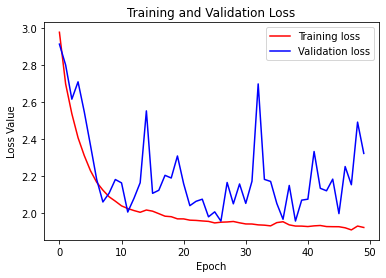

In [ ]:
EPOCHS = 50
BATCHSIZE = 1



def build_model():
  input_layer = tf.keras.Input(shape=(X_train[0].shape))
  resnet_layers = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', classes=23, input_tensor=input_layer)
  resnet_layers.trainable = False

  encoder_layers = [
                'conv1_pad',
                'conv1_conv',
                'conv1_bn',
                'conv1_relu',
                'pool1_pad',
                'pool1_pool',
                'conv2_block1_1_conv',
                'conv2_block1_1_bn',
                'conv2_block1_1_relu',
                'conv2_block1_2_conv',
                'conv2_block1_2_bn',
                'conv2_block1_2_relu',
                'conv2_block1_0_conv',
                'conv2_block1_3_conv',
                'conv2_block1_0_bn',
                'conv2_block1_3_bn',
                'conv2_block1_add',
                'conv2_block1_out',
                'conv2_block2_1_conv',
                'conv2_block2_1_bn',
                'conv2_block2_1_relu',
                'conv2_block2_2_conv',
                'conv2_block2_2_bn',
                'conv2_block2_2_relu',
                'conv2_block2_3_conv',
                'conv2_block2_3_bn',
                'conv2_block2_add',
                'conv2_block2_out'        
  ]


  #input_layer = tf.keras.Input(shape=(X_train[0].shape))
  encoder_layers = [resnet_layers.get_layer(name).output for name in encoder_layers]
  encoder = tf.keras.Model(inputs=resnet_layers.input, outputs=encoder_layers)

  decoder = tf.keras.layers.UpSampling2D(size=(2,2))(encoder.layers[-1].output)
  decoder = tf.keras.layers.Conv2DTranspose(filters=23, kernel_size=(3,3), strides=(2,2), padding='same', output_padding=(1,1))(decoder)
  decoder = tf.keras.layers.BatchNormalization()(decoder)

  print('\n\n\nModel Created.\n\n\n')
  model = tf.keras.Model(inputs=resnet_layers.input, outputs=decoder, name="resnet_model")
  #model.summary()
  #tf.keras.utils.plot_model(decoder_model, show_shapes=True)

  return model

model = build_model()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/gdrive/Shareddrives/SEP_769/Checkpoints', monitor='val_accuracy', mode='min',save_best_only=True)
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

with tf.device('/device:GPU:0'):
  hist = model.fit(X_train, Y_train, batch_size=BATCHSIZE, epochs=EPOCHS, validation_data=(X_val, Y_val), verbose=1, callbacks=[checkpoint])
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(EPOCHS)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss') 
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# plt.ylim([0, 1])
plt.legend()
plt.show()


#Predictions

(192, 320, 3)
[[ 8  8  8 ... 21 21 21]
 [ 8  8  8 ... 21 21 21]
 [ 8  8  8 ... 21 21 21]
 ...
 [10 10 10 ...  2  2  2]
 [10 10 10 ...  2  2  2]
 [10 10 10 ...  2  2  2]]
(192, 320, 1)
[ 1  3  4  5  7  8  9 15 19 21 22]
(40, 192, 320, 1)
(40, 192, 320)


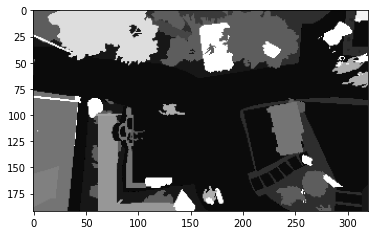

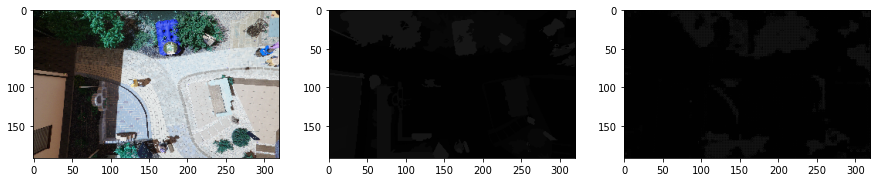

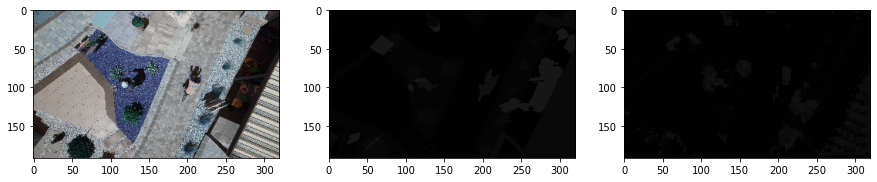

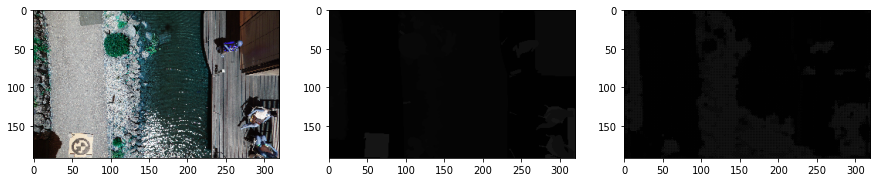

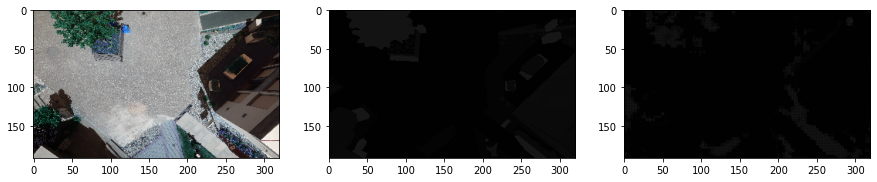

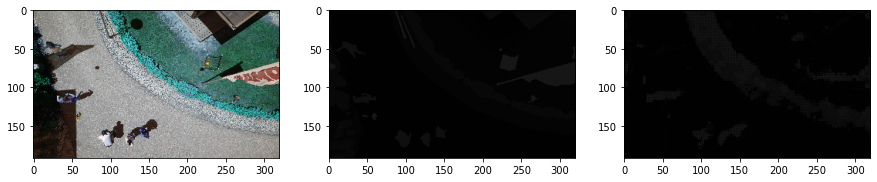

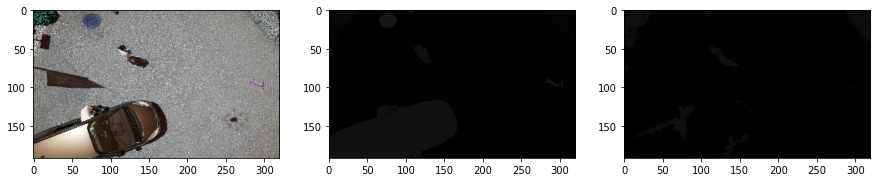

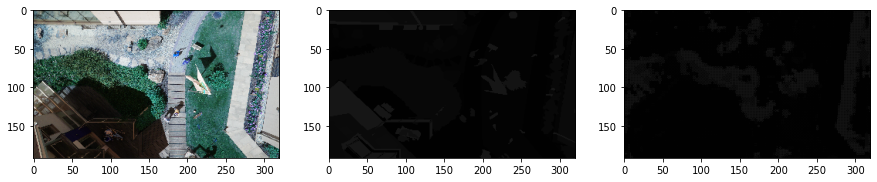

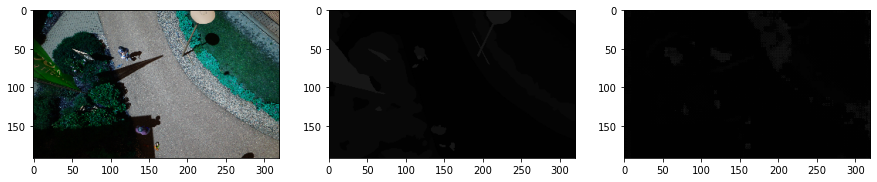

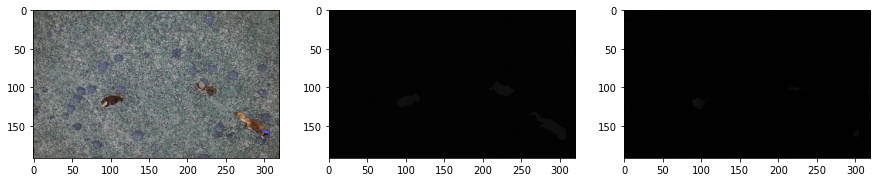

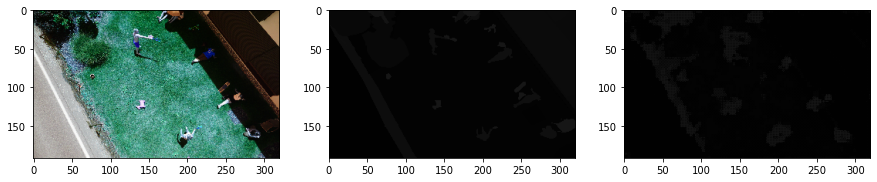

IOU Result = 0.040319688618183136
1363232
2457600
0.5547005208333333
Pixel Accuracy: 44.5%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
print(x_test[0].shape)
predictions = model.predict(x_test)*22
#print(y_test[0].shape)
#print(predictions[0].shape)
print(y_test[0])
#print(np.argmax(predictions[0,0,0,:], axis=-1))
# print(predictions[0].shape)
# print(np.unique(predictions[0,:,:,0]))
# for i in range(5):
#   print(len(predictions[i].shape))
#   print(predictions[i].shape)
#   display_images([x_test[i], predictions[i]])
plt.imshow(x_test[0])


def create_mask(pred):
  mask = np.argmax(pred, axis=-1)
  mask = mask[..., np.newaxis]
  return mask

predictions_processed = np.array([create_mask(predictions[i]) for i in range(len(predictions))])


prediction_converted = create_mask(predictions[0])
print(prediction_converted.shape)
print(np.unique(prediction_converted))
plt.imshow(prediction_converted[:,:,0], cmap='gray')

plt.imshow(y_test[0], cmap='gray')

print(predictions_processed.shape)
print(np.squeeze(predictions_processed).shape)
predictions_processed = np.squeeze(predictions_processed)


for i in range(10):
  display_images([x_test[i], y_test[i], predictions_processed[i]])



#METRICS
iou = tf.keras.metrics.MeanIoU(num_classes=23)
iou.update_state(y_test, predictions_processed)
print('IOU Result = {}'.format(iou.result().numpy()))

pixel_err = np.sum(predictions_processed != y_test)
print(pixel_err)
print(y_test.size)
print(pixel_err / y_test.size)
pixel_accuracy = 1 - pixel_err / y_test.size
print(f'Pixel Accuracy: {round(pixel_accuracy * 100, 1)}%')

model.save('/content/gdrive/Shareddrives/SEP_769/group2_resnet_segmentation.h5')


In [11]:
#FINAL SUBMISSION:
from google.colab import drive
import tensorflow as tf
import tensorflow_datasets as tfds
#drive.mount('/content/gdrive')
drive.mount('https://drive.google.com/drive/folders/1Hq9KByb1_0a2A5svcSiez0WJoVxzoSkM')
import cv2
import glob
import numpy as np
import pandas as pd
import os
import fnmatch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

#if not os.path.exists("/content/gdrive/Shareddrives/SEP_769/data/drone_data/"):
#  !unzip "/content/gdrive/Shareddrives/SEP_769/drone_data.zip" -d "/content/gdrive/Shareddrives/SEP_769/data"


#FUNCTIONS AND CONSTANTS
public_path = 'https://drive.google.com/drive/folders/1D4RoRwHG3MHJ5y863MEFO8_-xUMw8Len?usp=sharing/images/'

original_images_path = '/content/gdrive/Shareddrives/SEP_769/data/drone_data/original_images/'
original_semantic_path = '/content/gdrive/Shareddrives/SEP_769/data/drone_data/label_images_semantic/'
colourmap_path = '/content/gdrive/Shareddrives/SEP_769/class_dict_seg.csv'
rgb_masks_path = '/content/gdrive/Shareddrives/SEP_769/RGB_color_image_masks/RGB_color_image_masks/'
model_path = '/content/gdrive/Shareddrives/SEP_769/group2_vgg_segmentation.h5'
#model_path = '/content/gdrive/Shareddrives/SEP_769/Checkpoints' #resnet
gmaps_images_path = '/content/gdrive/Shareddrives/SEP_769/google_maps_imgs/'
HEIGHT = 192
WIDTH = 320
VAL_SPLIT = 0.9

#Reads all images from dir (unless num is specified), resizes and returns np array
def images_to_array(dir, width, height, ext='.jpg', num=0):
  data = []
  files = os.listdir(dir)
  files.sort()
  if num:
    for i in range(num):
      filename = files[i]
      if filename.endswith(ext):
        img = cv2.imread(dir+filename,flags=1)
        img = cv2.resize(img, (width, height))
        data.append(img)
  else:
    for filename in files:
      if filename.endswith(ext):
        img = cv2.imread(dir+filename,flags=1)
        img = cv2.resize(img, (width, height))
        data.append(img)
  return np.array(data)
#Plot provided images

def display_images(images):
  plt.figure(figsize=(15,10))
  for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    if len(images[i].shape) == 3:
      plt.imshow(images[i])
    else:
      plt.imshow(images[i], cmap="gray")
  plt.show()

#Convert segmentation masks from grayscale to RGB with colourmap
def labels_to_colour(label):
  colourmap = pd.read_csv(colourmap_path)
  red = np.zeros((192,320))
  green = np.zeros((192,320))
  blue = np.zeros((192,320))
  for i in range(len(label)):
    for j in range(len(label[i])):
      red[i:i+1,j:j+1] = colourmap[" r"][label[i][j]]
      green[i:i+1,j:j+1] = colourmap[" g"][label[i][j]]
      blue[i:i+1,j:j+1] = colourmap[" b"][label[i][j]]
  result = np.dstack((blue,green,red))
  return result

#Convert model outputs into single channel segmentation mask
def create_mask(pred):
  mask = np.argmax(pred, axis=-1)
  mask = mask[..., np.newaxis]
  return mask

#Prediction With Masks for Metrics
def performance_test(images, labels, model):
  predictions = model.predict(images)
  predictions_processed = np.array([create_mask(predictions[i]) for i in range(len(predictions))])
  predictions_processed = np.squeeze(predictions_processed)

  #Display first 5 true labels and predicted labels
  for i in range(5):
    display_images([images[i], labels[i], predictions_processed[i]])

  #Metrics using provided labels
  iou = tf.keras.metrics.MeanIoU(num_classes=23)
  iou.update_state(labels, predictions_processed)
  iou_result = iou.result().numpy()
  pixel_err = np.sum(predictions_processed != labels)
  pixel_accuracy = 1 - pixel_err / labels.size

  return predictions_processed, iou_result, pixel_err, pixel_accuracy

#Returns predictions for images as colour rgb segmentation mask
def color_predictions(images, model):
  predictions = model.predict(images)
  predictions_processed = np.array([create_mask(predictions[i]) for i in range(len(predictions))])
  predictions_processed = np.squeeze(predictions_processed)
  #predictions_processed = np.array([labels_to_colour(predictions_processed[i]).astype(int) for i in range(len(predictions_processed))])

  #Display first 5 images and predicted masks
  for i in range(5):
    display_images([images[i], predictions_processed[i]])

  return predictions_processed


#LOAD TRAINED MODEL
model = None
if os.path.exists(model_path):
  model = tf.keras.models.load_model(model_path)
#model.summary()


test_images = images_to_array(public_path, width=WIDTH, height=HEIGHT, ext='PNG')
test_images = test_images / 255

gmaps_predictions = color_predictions(gmaps_images, model)
print(gmaps_predictions.shape)






#IMPORTING DRONE IMAGES
images = images_to_array(original_images_path, width=WIDTH, height=HEIGHT, num=10)
images = images / 255
print('Imported images shape: ', images.shape)
labels = images_to_array(original_semantic_path, width=WIDTH, height=HEIGHT, ext='png', num=10)
labels = labels[:,:,:,1]
print('Imported labels shape: ', labels.shape)
rgb_masks = images_to_array(rgb_masks_path, width=WIDTH, height=HEIGHT, ext='png', num=10)


#Running Model performance test on drone images
predictions, iou_result, pixel_err, pixel_accuracy = performance_test(images, labels, model)
print('\n\nMetrics for Drone Images')
print('IOU Result = {}'.format(iou_result))
print('Pixel Error Result = {}'.format(pixel_err))
print(f'Pixel Accuracy: {round(pixel_accuracy * 100, 1)}%\n\n')

#IMPORTING GOOGLE MAPS IMAGES - overwriting drone images/predictions to save memory
gmaps_images = images_to_array(gmaps_images_path, width=WIDTH, height=HEIGHT, ext='PNG')
gmaps_images = gmaps_images / 255

#Getting predictions for google maps images
gmaps_predictions = color_predictions(gmaps_images, model)
print(gmaps_predictions.shape)

#Flagging Possible Accidents
#INSERT ADAMS CODE







ValueError: ignored